# Stock Analysis with yfinance, seaborn and plotly

In this notebook, we created a class using yfinance and plotly to download and analyze stock data. The class automatically retrieves OHLC data for a given ticker symbol (e.g., 'NFLX') from Yahoo Finance.

## **Key Analyses:**
1. **Retrieving Data:**
   Used yfinance to fetch daily OHLC data (Open, High, Low, Close) and other stock information like Volume for the selected ticker.

2. **Closing Price, Volume, and Daily Change:**
- Visualized the closing price over time.
- Analyzed trading volume and calculated daily percentage changes in stock price.
  
3. **Moving Averages:** 
Computed 10-day, 20-day and 50-day Moving Averages to identify short-term and long-term stock trends.

4. **Daily Return:**
Calculated daily returns to assess average performance and volatility.

5. **Candlestick Chart:**
Created an interactive candlestick chart to visualize the stock's price movements using the Open, High, Low, and Close data.

# 1. Closing Price, Volume, Daily Change

Closing price serves as a key indicator in analyzing the performance of that stock over time. Investors typically use the closing price as the benchmark for evaluating the performance of a stock.
Historical closing prices will be ised to calculate the moving average, percentage change, and volatility.

Volume is a fundamental metric in trading, especially when used in conjunction with price analysis. For instance, a price increase along with high volume often signifies strong buying interest, while a price increase with low volume may signal a lack of conviction and may not be sustainable.

In [113]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf

In [4]:
class Stock:
    
    def __init__(
        self,
        ticker: str,
        period: str='1y',
        interval: str='1d',
        start: str=None,
        end: str=None
    ) -> None:
        
        self.ticker = ticker
        self.period = period
        self.interval = interval
        self.start = start
        self.end = end
        self.df = yf.Ticker(self.ticker).history(
            period=self.period,
            interval=self.interval,
            start=self.start,
            end=self.end,
        ).drop(['Dividends', 'Stock Splits'], axis=1)


# 1. Closing Price, Volume, Daily Change

Closing price serves as a key indicator in analyzing the performance of that stock over time. Investors typically use the closing price as the benchmark for evaluating the performance of a stock.
Historical closing prices will be ised to calculate the moving average, percentage change, and volatility.

Volume is a fundamental metric in trading, especially when used in conjunction with price analysis. For instance, a price increase along with high volume often signifies strong buying interest, while a price increase with low volume may signal a lack of conviction and may not be sustainable.

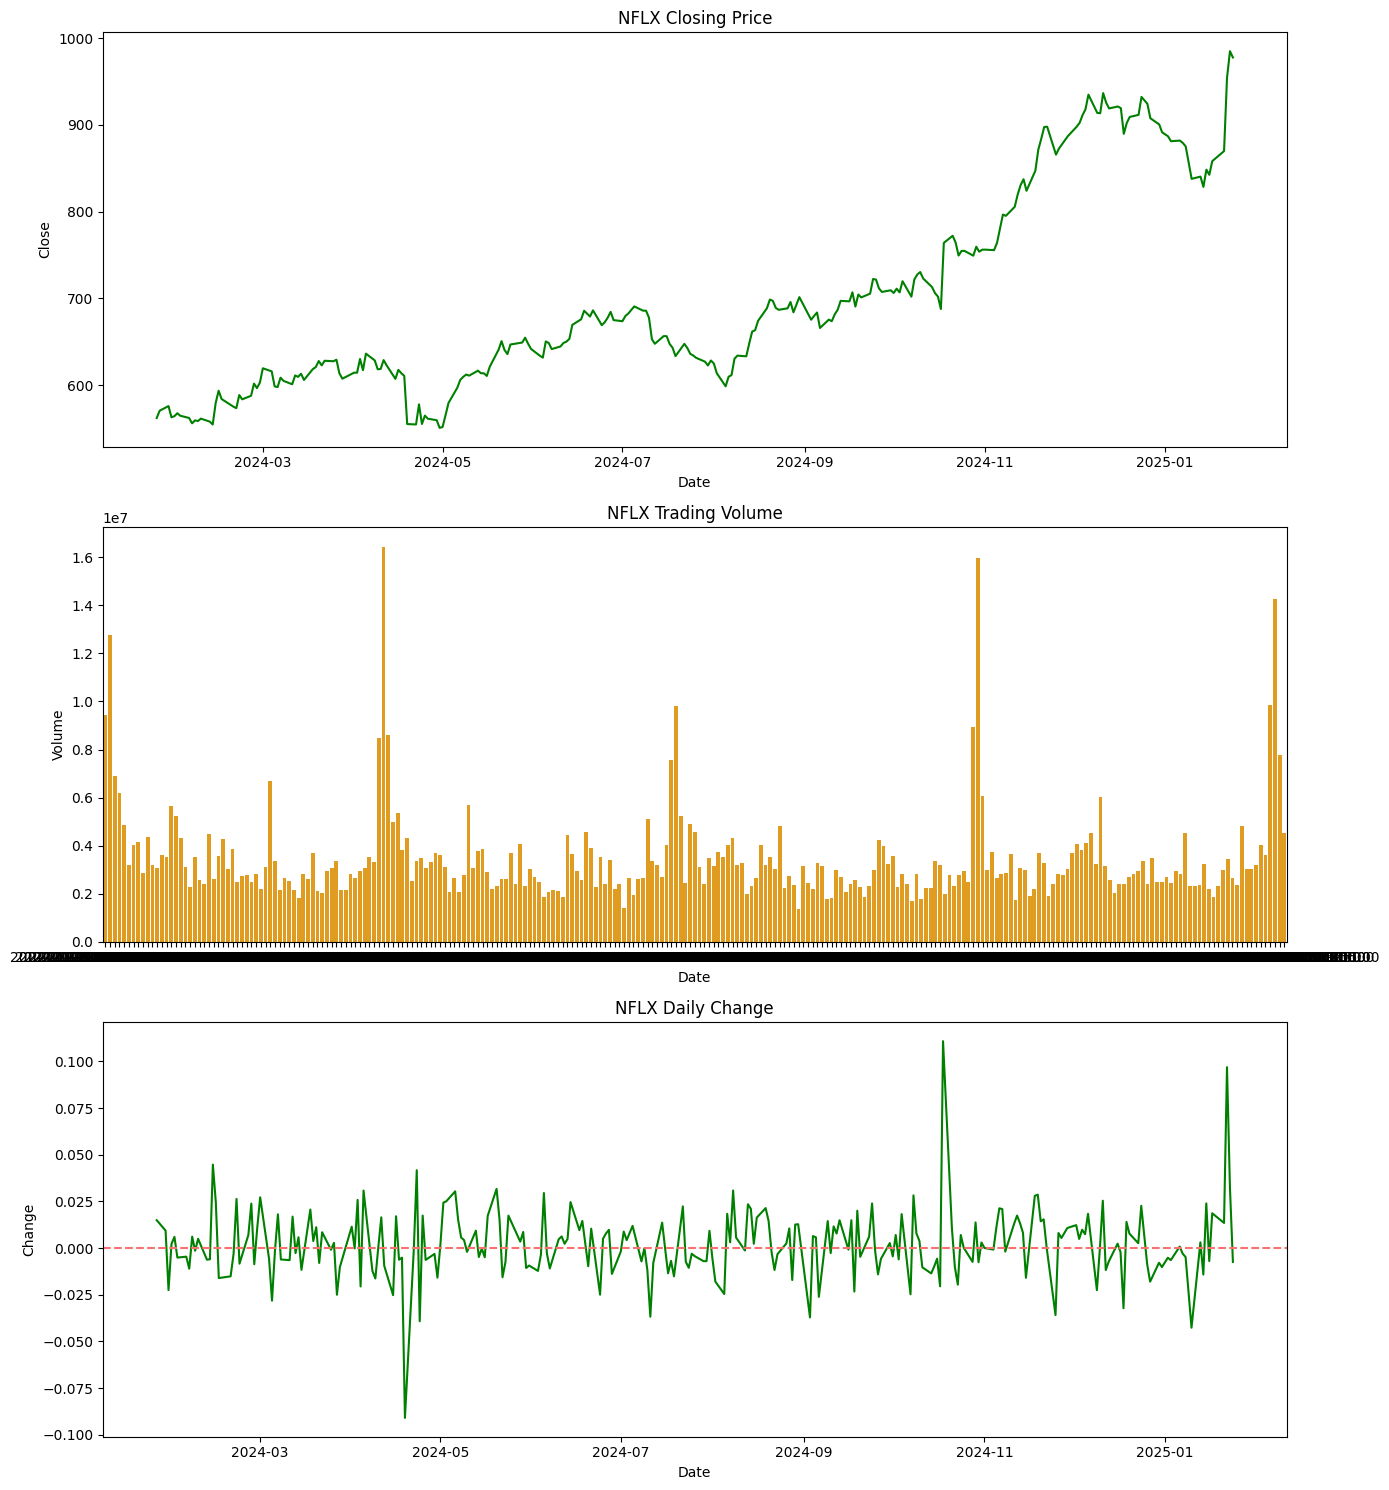

In [102]:
NFLX = Stock('NFLX').df

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15))

# Plot the closing price
sns.lineplot(data=NFLX, ax=ax1, x=NFLX.index, y='Close', color='green')
ax1.set_title('NFLX Closing Price')

# Plot the volume
sns.barplot(data=NFLX, ax=ax2, x=NFLX.index, y='Volume', color='orange')
ax2.set_title('NFLX Trading Volume')

# Plot the daily percentage change
NFLX_change = NFLX['Close'].pct_change()
NFLX_change_df = pd.DataFrame({'Change': NFLX_change})  # Create a DataFrame with the change as a column
sns.lineplot(data=NFLX_change_df, ax=ax3, x=NFLX_change_df.index, y='Change', color='green')
ax3.axhline(0, color='#fa6f6f', linestyle='--') 
ax3.set_title('NFLX Daily Change')

plt.tight_layout()
plt.show()

In [68]:
NFLX_change = NFLX['Close'].pct_change() + 1  # Add 1 to each change to adjust

def geo_mean(arr):
    return np.prod(arr)**(1/len(arr))

# Call function on the percentage changes, excluding the first NaN value
geo_mean_NFLX = geo_mean(NFLX_change.dropna())-1
print(f"Geometric mean of daily percentage change (average daily percentage change over the period): {geo_mean_NFLX* 100:.4f}%")

Geometric mean of daily percentage change (average daily percentage change over the period): 0.2217%


# 2. Moving average

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

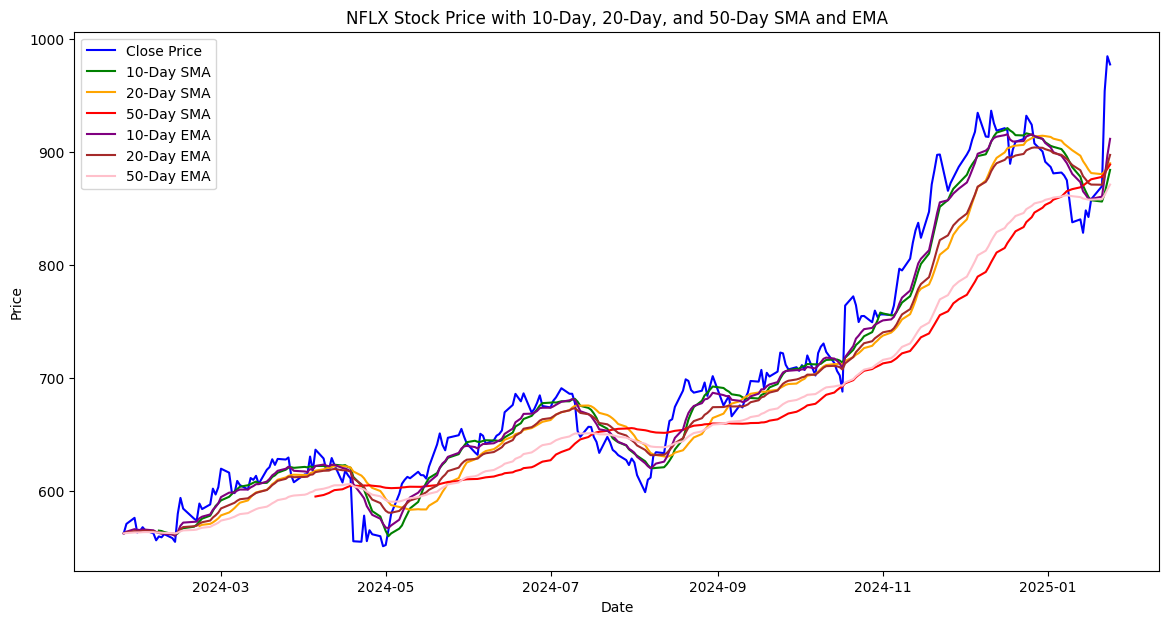

In [88]:
# Calculate Simple Moving Average (SMA) for 10 days, 20 days, and 50 days
NFLX['SMA_10'] = NFLX['Close'].rolling(window=10).mean()
NFLX['SMA_20'] = NFLX['Close'].rolling(window=20).mean()
NFLX['SMA_50'] = NFLX['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Average (EMA) for 10 days, 20 days, and 50 days
NFLX['EMA_10'] = NFLX['Close'].ewm(span=10, adjust=False).mean()
NFLX['EMA_20'] = NFLX['Close'].ewm(span=20, adjust=False).mean()
NFLX['EMA_50'] = NFLX['Close'].ewm(span=50, adjust=False).mean()

# Plotting the Close price, SMA, and EMA
plt.figure(figsize=(14, 7))

# Plotting the closing prices
sns.lineplot(data=NFLX, x=NFLX.index, y='Close', label='Close Price', color='blue')

# Plotting the Simple Moving Averages (SMA)
sns.lineplot(data=NFLX, x=NFLX.index, y='SMA_10', label='10-Day SMA', color='green')
sns.lineplot(data=NFLX, x=NFLX.index, y='SMA_20', label='20-Day SMA', color='orange')
sns.lineplot(data=NFLX, x=NFLX.index, y='SMA_50', label='50-Day SMA', color='red')

# Plotting the Exponential Moving Averages (EMA)
sns.lineplot(data=NFLX, x=NFLX.index, y='EMA_10', label='10-Day EMA', color='purple')
sns.lineplot(data=NFLX, x=NFLX.index, y='EMA_20', label='20-Day EMA', color='brown')
sns.lineplot(data=NFLX, x=NFLX.index, y='EMA_50', label='50-Day EMA', color='pink')

plt.title('NFLX Stock Price with 10-Day, 20-Day, and 50-Day SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# 4. Daily return.

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

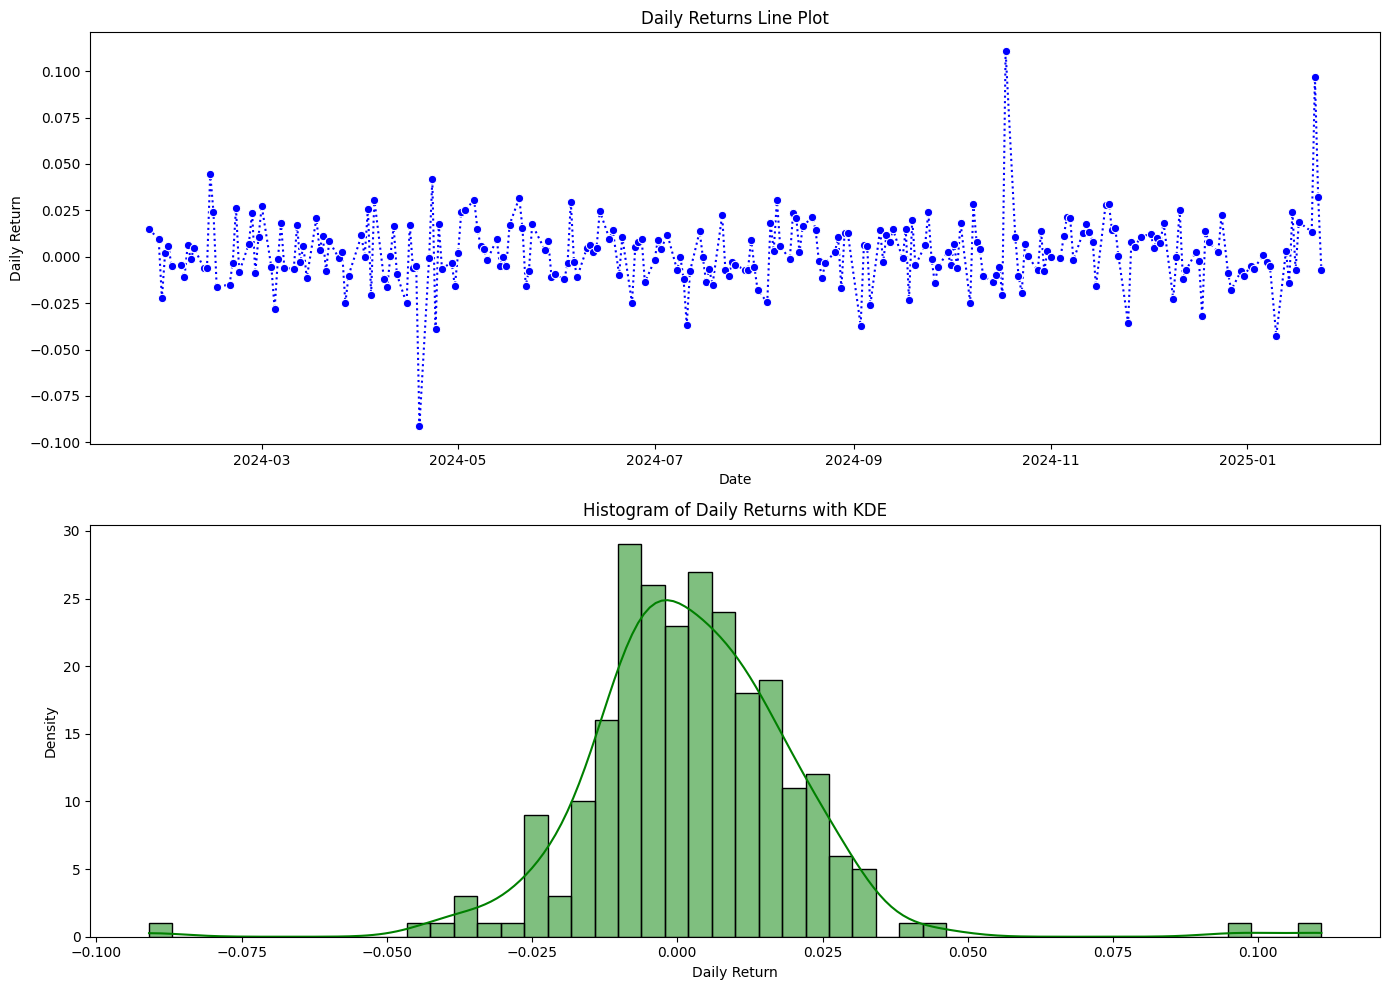

In [100]:
# Calculate daily returns as percentage change of 'Close' prices
NFLX['Daily_Return'] = NFLX['Close'].pct_change()

# Plotting the histograms for daily returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Line plot of daily returns
sns.lineplot(data=NFLX, x=NFLX.index, y='Daily_Return', ax=ax1, color='blue', linestyle=':', marker='o')
ax1.set_title('Daily Returns Line Plot')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return')

# Histogram of daily returns with a Kernel Density Estimate (KDE) overlay
sns.histplot(NFLX['Daily_Return'], kde=True, ax=ax2, bins=50, color='green')
ax2.set_title('Histogram of Daily Returns with KDE')
ax2.set_xlabel('Daily Return')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

# 5. Candlestick

A candlestick chart is a type of financial chart used to represent the price movement of an asset over a specific time period. It’s widely used in technical analysis to help visualize the open, high, low, and close prices (OHLC) for a particular time frame (e.g., daily, hourly).

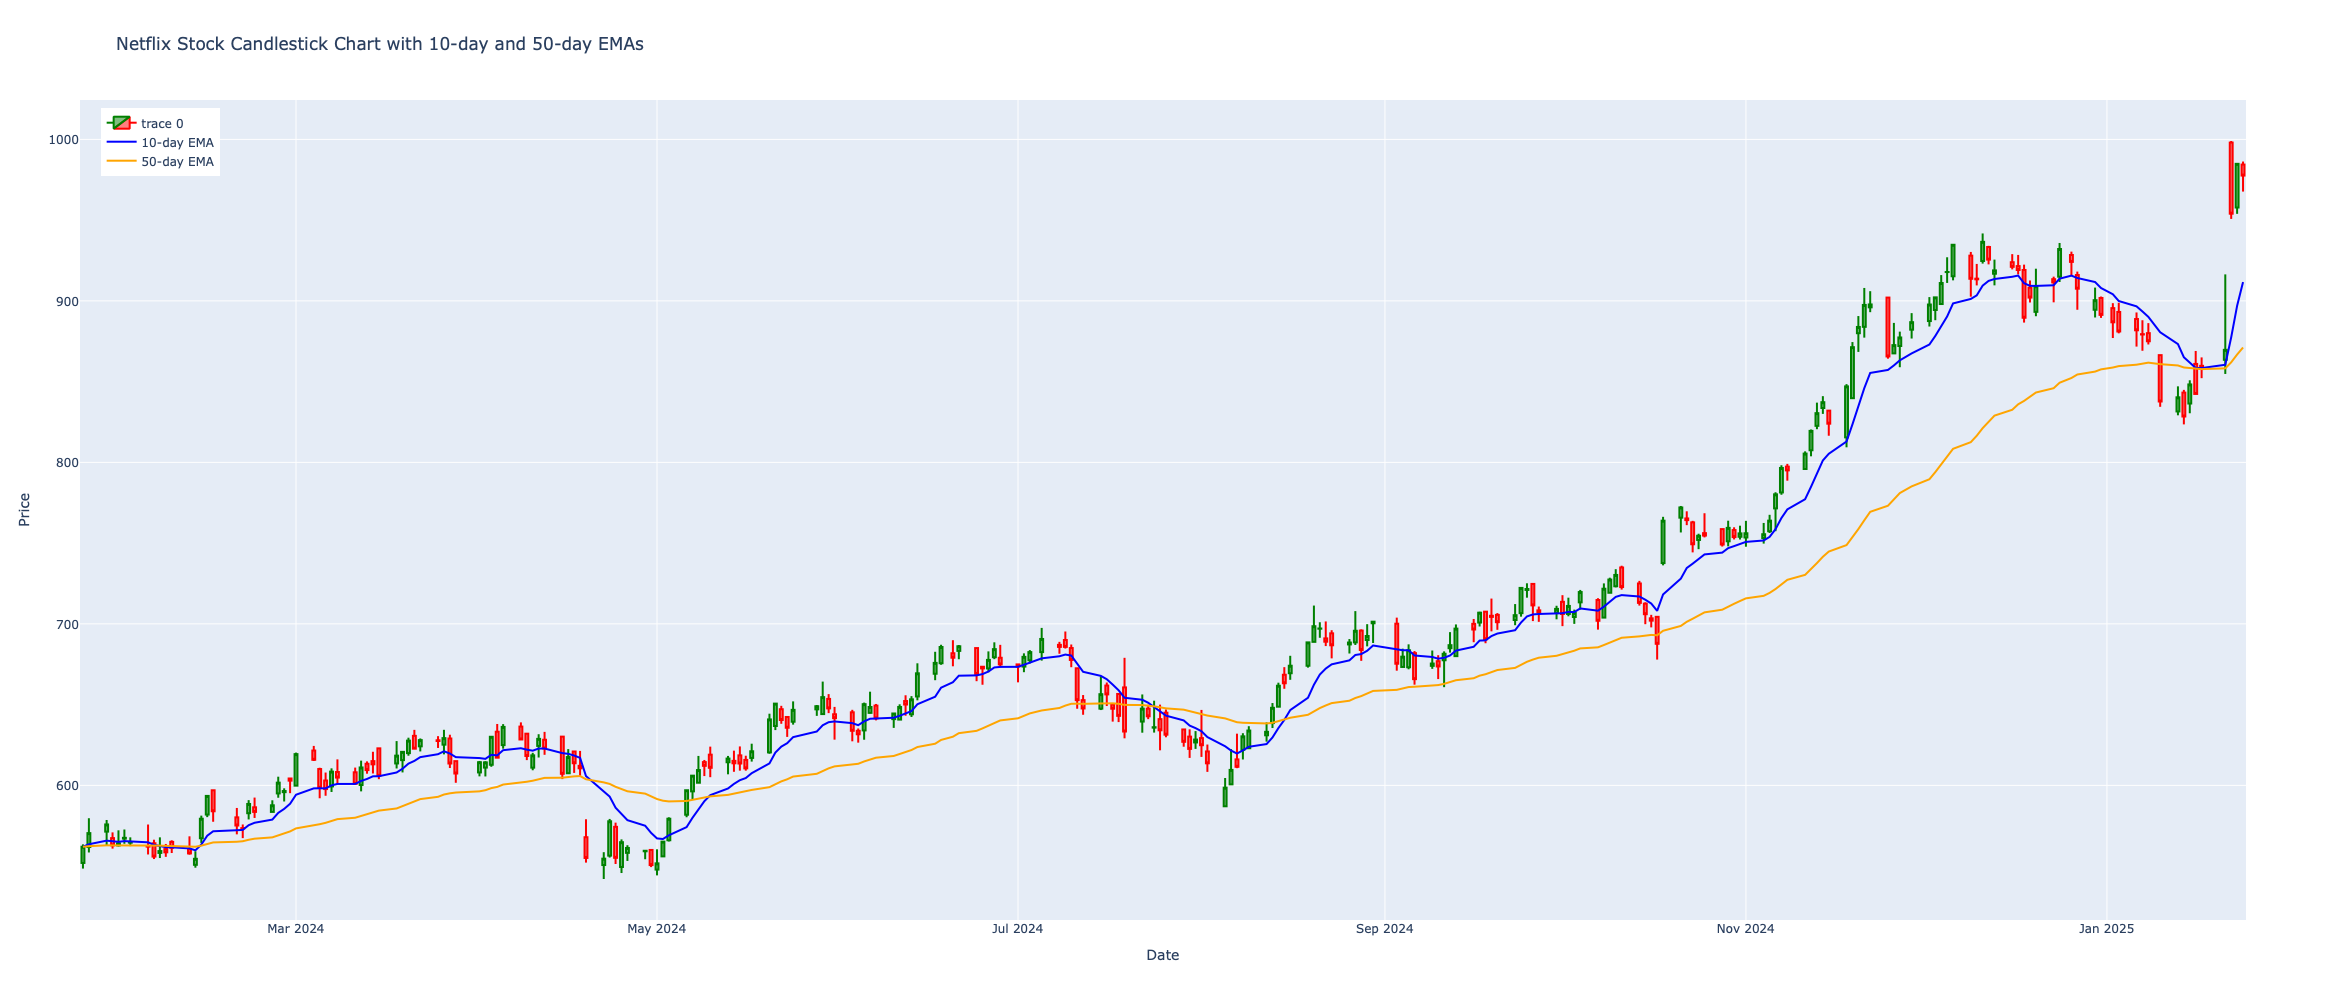

In [112]:
# Calculate the 10-day and 50-day Exponential Moving Averages (EMA)
NFLX['EMA10'] = NFLX['Close'].ewm(span=10, adjust=False).mean()
NFLX['EMA50'] = NFLX['Close'].ewm(span=50, adjust=False).mean()

# Create the Candlestick chart with EMAs
fig = go.Figure()

# Add the Candlestick chart
fig.add_trace(go.Candlestick(
    x=NFLX.index,            
    open=NFLX['Open'],     
    high=NFLX['High'],        
    low=NFLX['Low'],         
    close=NFLX['Close'],      
    increasing_line_color='green',  
    decreasing_line_color='red',    
))

# Add the 10-day EMA
fig.add_trace(go.Scatter(
    x=NFLX.index,
    y=NFLX['EMA10'],
    mode='lines',
    name='10-day EMA',
    line=dict(color='blue', width=2)  
))

# Add the 50-day EMA
fig.add_trace(go.Scatter(
    x=NFLX.index,
    y=NFLX['EMA50'],
    mode='lines',
    name='50-day EMA',
    line=dict(color='orange', width=2) 
))

fig.update_layout(
    title='Netflix Stock Candlestick Chart with 10-day and 50-day EMAs',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Optional: Hide the range slider for a cleaner look
    legend=dict(x=0.01, y=0.99),      # Optional: Position the legend
    height=1000                        # Set the height of the chart to 650 pixels
)

# Show the plot
fig.show()

# Takeaway:

This notebook provides a comprehensive analysis of stock performance, combining retrieved data, moving averages, daily returns, and candlestick charts to assess trends and risk.